The following simulation ids are missing:
   [14]
Processing 1980-01-16 12:00:00
Processing 1980-02-15 12:00:00
Processing 1980-03-16 12:00:00
Processing 1980-04-16 00:00:00
Processing 1980-05-16 12:00:00
Processing 1980-06-16 00:00:00
Processing 1980-07-16 12:00:00
Processing 1980-08-16 12:00:00
Processing 1980-09-16 00:00:00
Processing 1980-10-16 12:00:00
Processing 1980-11-16 00:00:00
Processing 1980-12-16 12:00:00
Processing 1981-01-16 12:00:00
Processing 1981-02-15 00:00:00
Processing 1981-03-16 12:00:00
Processing 1981-04-16 00:00:00
Processing 1981-05-16 12:00:00
Processing 1981-06-16 00:00:00
Processing 1981-07-16 12:00:00
Processing 1981-08-16 12:00:00
Processing 1981-09-16 00:00:00
Processing 1981-10-16 12:00:00
Processing 1981-11-16 00:00:00
Processing 1981-12-16 12:00:00
Processing 1982-01-16 12:00:00
Processing 1982-02-15 00:00:00
Processing 1982-03-16 12:00:00
Processing 1982-04-16 00:00:00
Processing 1982-05-16 12:00:00
Processing 1982-06-16 00:00:00
Processing 1982-07-1

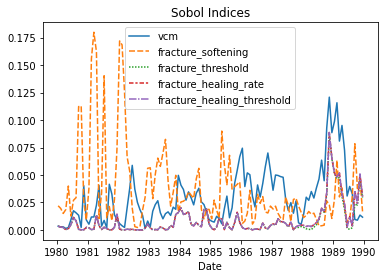

In [357]:
 run ../util/analyze_sobol.py --ensemble_file ../historical/2021_12_fractures_narrow/uq/jib_fractures_narrow.csv ../historical/2021_12_fractures_narrow/csv/fldsum_ts.csv

M6
M9
M13
M17
M20


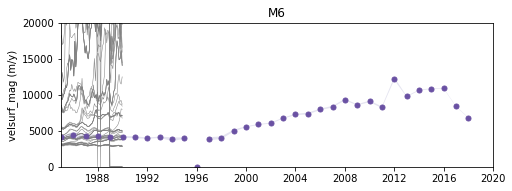

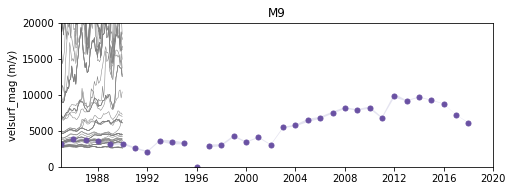

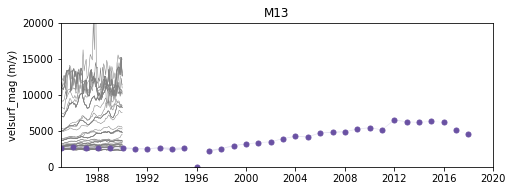

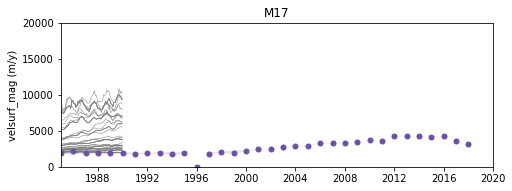

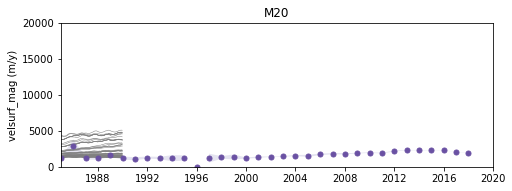

In [431]:
run ../util/plot_timeseries.py --obs_file ../data_sets/velocities/profiles/gps_stations_GRE_G0240_1985_2018.nc ../historical/2021_12_fractures_narrow/profiles/gps_stations_ex_jib_g600m_v1_RAGIS_id_*_1980-1-1_1990-1-1.nc


In [377]:
!open *pdf


The following simulation ids are missing:
   [14]
The following simulation ids are missing:
   [14]


/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


  saving to jib_total_grounding_line_flux.pdf
  saving to jib_vonmises_calving_rate.pdf


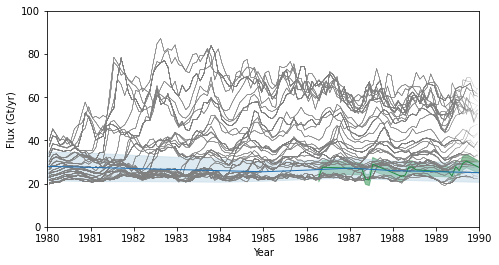

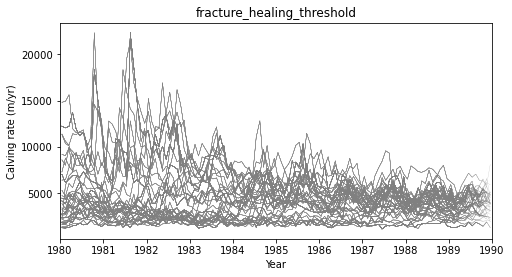

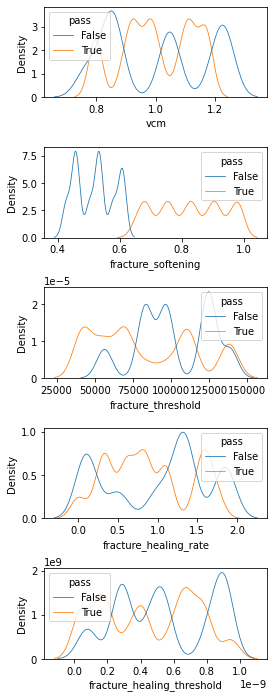

In [446]:
run ../util/analyze_csv.py --smoothing_length 13 --variable "total_grounding_line_flux (Gt year-1)"  --ensemble_file ../historical/2021_12_fractures_narrow/uq/jib_fractures_narrow.csv --sum_file ../historical/2021_12_fractures_narrow/csv/fldsum_ts.csv --mean_file ../historical/2021_12_fractures_narrow/csv/fldmean_ts.csv

In [443]:
sum_df

,id,vcm,fracture_softening,fracture_threshold,fracture_healing_rate,fracture_healing_threshold,time,basal_mass_flux_floating (kg m-2 year-1),beta (Pa s / m),bmelt (m year-1),...,tendency_of_subglacial_water_mass (Gt year-1),thk (m),tillwat (m),topg (m),usurf (m),velbase_mag (m year-1),velsurf_mag (m year-1),vonmises_calving_rate (m year-1),vonmises_stress (Pascal),total_grounding_line_flux (Gt year-1)
0,0,0.859863,0.458008,97041.015625,1.353516,2.874707e-10,1980-01-16 12:00:00,-24810110.0,1.128883e+19,30754.146,...,5.382148,545884350.0,176501.62,-12764328.0,533189340.0,12325401.0,16481714.0,183879.38,1.698817e+10,37.316772
1,0,0.859863,0.458008,97041.015625,1.353516,2.874707e-10,1980-02-15 12:00:00,-25521566.0,1.128935e+19,32551.848,...,2.133090,545881000.0,176475.80,-12764328.0,533187200.0,12331024.0,16487139.0,168944.30,1.707042e+10,42.070000
2,0,0.859863,0.458008,97041.015625,1.353516,2.874707e-10,1980-03-16 12:00:00,-26878358.0,1.129010e+19,33606.984,...,1.223731,545876100.0,176447.08,-12764328.0,533183600.0,12292049.0,16448585.0,159224.00,1.704132e+10,41.602592
3,0,0.859863,0.458008,97041.015625,1.353516,2.874707e-10,1980-04-16 00:00:00,-27796180.0,1.129105e+19,34725.870,...,0.890590,545876000.0,176422.08,-12764328.0,533184830.0,12378102.0,16535050.0,178475.75,1.702484e+10,37.644512
4,0,0.859863,0.458008,97041.015625,1.353516,2.874707e-10,1980-05-16 12:00:00,-28511982.0,1.129213e+19,35178.395,...,0.519540,545869060.0,176393.84,-12764328.0,533181120.0,12560075.0,16718727.0,154873.61,1.693765e+10,38.443390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,55,1.016113,0.802539,70185.546875,0.251953,9.448926e-10,1989-08-16 12:00:00,-21601670.0,1.138545e+19,27705.527,...,-0.075376,545752770.0,173366.47,-12764328.0,533134660.0,10734700.0,14907645.0,92719.82,1.686321e+10,33.126680
6596,55,1.016113,0.802539,70185.546875,0.251953,9.448926e-10,1989-09-16 00:00:00,-22233314.0,1.138548e+19,28122.285,...,-0.048386,545757900.0,173340.95,-12764328.0,533140130.0,10720842.0,14893621.0,86348.88,1.688585e+10,32.951866
6597,55,1.016113,0.802539,70185.546875,0.251953,9.448926e-10,1989-10-16 12:00:00,-21856648.0,1.138618e+19,27446.918,...,-0.182211,545757440.0,173315.36,-12764328.0,533140860.0,10563990.0,14737862.0,82341.37,1.700781e+10,32.435295
6598,55,1.016113,0.802539,70185.546875,0.251953,9.448926e-10,1989-11-16 00:00:00,-21661414.0,1.138745e+19,27392.102,...,-0.089117,545759940.0,173292.81,-12764328.0,533143420.0,10716222.0,14889432.0,100908.08,1.696249e+10,31.868649
